In [1]:
import numpy as np # 텐서 연산
import pandas as pd # 표 형식
import matplotlib.pyplot as plt # 그래프

In [2]:
class 완전연결:
    def __init__(self, 입력수, 출력수, 활성화=None):
        self.W = np.random.randn(입력수, 출력수)
        self.b = np.random.randn(출력수)
        self.activation = 활성화

    def __call__(self, Xs):
        zs = np.dot(Xs, self.W) + self.b
        if self.activation:
            return self.activation(zs)
        return zs # 항등 함수

class 신경망:
    def __init__(self):
        self.layers = []

    def add(self, 계층):
        self.layers.append(계층)

    def __call__(self, Xs):
        """순전파 (feed forward)"""
        출력 = Xs
        for 계층 in self.layers:
            출력 = 계층(출력)
        return 출력

FC = Dense = Affine = Linear = 완전연결

In [3]:
import pickle

In [4]:
with open('data/mnist/mnist_ndarray.pkl', 'rb') as 파일:
    mnist_data = pickle.load(파일)

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist_data
print(train_images.shape, test_images.shape)
assert train_images.shape[1:] == test_images.shape[1:]
assert len(train_images) == len(train_labels)
assert len(test_images) == len(test_labels)

(60000, 28, 28) (10000, 28, 28)


In [6]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
train_images[0].min(), train_images[0].max()

(0, 255)

In [8]:
np.exp(1000.0)

C:\Users\student\AppData\Local\Temp\ipykernel_1756\1233423015.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(1000.0)


inf

In [9]:
def 전처리(images):
    Xs = images.astype('float32')
    Xs = Xs.reshape(-1, 28 * 28)
    Xs /= 255
    return Xs

X_train = 전처리(train_images)
print(train_images.dtype, '->', X_train.dtype)
print(train_images.shape, '->', X_train.shape)
print(train_images.max(), '->', X_train.max())

uint8 -> float32
(60000, 28, 28) -> (60000, 784)
255 -> 1.0


In [10]:
sigmoid = lambda z: 1 / (1 + np.exp(-z))

model = 신경망()
model.add(FC(784, 50, sigmoid))
model.add(FC(50, 100, sigmoid))
model.add(FC(100, 10))

학습된 가중치를 신경망의 각 계층에 적용합니다.

In [11]:
import pickle

with open('data/mnist/mnist_weight.pkl', 'rb') as 파일:
    params = pickle.load(파일)

for layer, (W, b) in zip(model.layers, params):
    assert layer.W.shape == W.shape
    assert layer.b.shape == b.shape
    layer.W = W
    layer.b = b

In [12]:
X_test = 전처리(test_images)
outputs = model(X_test)
print(f'X={X_test.shape} -> model -> y={outputs.shape}')
y_pred = outputs.argmax(axis=1)
채점 = y_pred == test_labels
print(f'분류 정확도: {np.mean(채점):.2%}')

X=(10000, 784) -> model -> y=(10000, 10)
분류 정확도: 93.52%


In [13]:
np.array([[0.7, 0.2, 0.1],
          [0.2, 0.7, 0.1],
          [0.2, 0.1, 0.7]]).argmax(axis=1)

array([0, 1, 2], dtype=int64)

# 신경망 학습

1. 손실 함수
2. 최적화

## 손실 함수

1. 회귀 출력 (평균제곱오차)
2. 분류 출력

Loss (y): 0.0
Loss (y0): 1.12
Loss (y_LR): 1.06
Loss (y1): 9.01


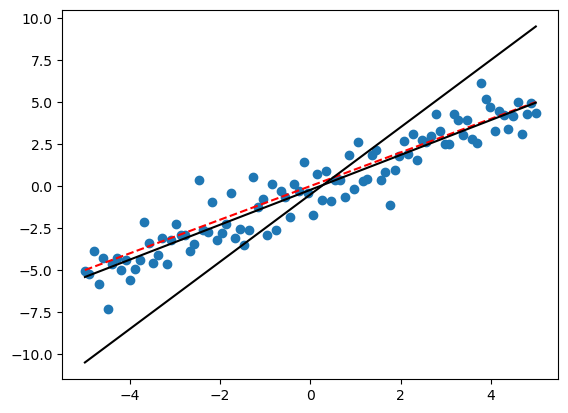

In [14]:
from sklearn.linear_model import LinearRegression

x = np.linspace(-5, 5, 100)
noise = np.random.randn(len(x))
y = x + noise

Xs = x.reshape(-1, 1)
model = LinearRegression().fit(Xs, y)

# 선형 모형
f = lambda x, w, b: w * x + b
# 평균제곱오차
평균제곱오차 = mse = lambda y, y_pred: np.mean((y - y_pred) ** 2)
y0 = y - noise
y1 = f(x, w=2.0, b=-0.5)
print(f'Loss (y): {mse(y, y)}')
print(f'Loss (y0): {mse(y, y0):.2f}')
print(f'Loss (y_LR): {mse(y, y_pred=model.predict(Xs)):.2f}')
print(f'Loss (y1): {mse(y, y1):.2f}')

plt.scatter(x, y)
plt.plot(x, y - noise, 'r--')
plt.plot(x, model.predict(Xs), 'k')
plt.plot(x, y1, 'k')
plt.show()

### 분류 출력 평가

In [15]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
np.unique(iris.target)

model = LogisticRegression(C=0.1).fit(iris.data, iris.target)
outputs = model.predict_proba(iris.data)
pd.DataFrame(outputs, columns=[f'Pr(y={i}|x)' for i in range(3)]).sample(5)

,Pr(y=0|x),Pr(y=1|x),Pr(y=2|x)
5,0.892603,0.105913,0.001484
115,0.005725,0.232305,0.761971
59,0.138957,0.698868,0.162175
30,0.878729,0.120383,0.000888
41,0.870316,0.129117,0.000567


In [16]:
유형수 = 3
원핫행렬 = np.eye(유형수)
원핫행렬

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [17]:
outputs = np.array([0.7, 0.2, 0.1])
label = 0
y = 원핫행렬[label]
print(f'{label} -> OHE -> {y}')
오차 = y - outputs
print(f'error={오차}')

0 -> OHE -> [1. 0. 0.]
error=[ 0.3 -0.2 -0.1]


In [18]:
SSE = lambda y, y_pred: np.sum((y - y_pred) ** 2) * 0.5

y = np.array([1, 0, 0])
print(f'Loss={SSE(y, y_pred=np.array([0.3, 0.3, 0.4])):.2f}')
print(f'Loss={SSE(y, y_pred=np.array([0.7, 0.2, 0.1])):.2f}')
print(f'Loss={SSE(y, y_pred=np.array([1.0, 0.0, 0.0]))}')

Loss=0.37
Loss=0.07
Loss=0.0


In [19]:
H = 정보엔트로피산출 = lambda p: -np.sum(p * np.log2(p))

In [20]:
print(f'평균정보량: {H(p=np.array([0.5, 0.5]))} 새넌')

평균정보량: 1.0 새넌


In [21]:
print(f'평균정보량: {H(p=np.array([1/2, 1/4, 1/8, 1/8]))} 새넌')
print(f'평균정보량: {H(p=np.array([0.25, 0.25, 0.25, 0.25]))} 새넌')

평균정보량: 1.75 새넌
평균정보량: 2.0 새넌


In [22]:
교차엔트로피오차 = lambda y, y_pred: -np.sum(y * np.log(y_pred + 1e-7))

In [23]:
y = np.array([1, 0, 0])
y1 = np.array([0.4, 0.5, 0.1])
y2 = np.array([0.7, 0.2, 0.1])
y3 = np.array([1.0, 0., 0.])

print(f'CEE={교차엔트로피오차(y, y1):.3f}')
print(f'CEE={교차엔트로피오차(y, y2):.3f}')
print(f'CEE={교차엔트로피오차(y, y3):.3f}')

CEE=0.916
CEE=0.357
CEE=-0.000


## 최적화

함수의 최소, 최대값을 찾는 과정

1. 방정식
2. 경사 하강

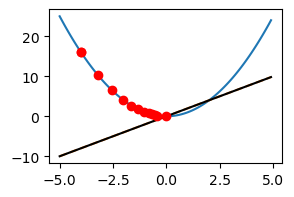

In [24]:
x = np.arange(-5, 5, 0.1)
f = lambda x: x ** 2
dfdx = lambda x: 2 * x

def 수치미분(f, x):
    h = 1e-4
    return (f(x + h) - f(x)) / h

plt.figure(figsize=(3, 2))
plt.plot(x, f(x))
plt.plot(x, dfdx(x), '--')
plt.plot(x, 수치미분(f, x), 'k')

# 출발점
x0 = -4
plt.plot(x0, f(x0), 'ro')

def 경사하강(f, x0, 학습횟수, 학습률):
    x = x0
    x_history = [x]
    for 학습 in range(학습횟수):
        경사 = 수치미분(f, x)
        x = x - 경사 * 학습률
        x_history.append(x)
    return x_history

x_history = 경사하강(f, x0=-4, 학습횟수=10, 학습률=0.1)
x_history = np.array(x_history)
plt.plot(x_history, f(x_history), 'ro')
# 최적점 (목표)
plt.plot(0, 0, 'ro')
plt.show()

## 학습 알고리즘

In [25]:
import numpy as np
import time

sigmoid = lambda z: 1 / (1 + np.exp(-z))

def softmax(z):
    if z.ndim == 1:
        z = z.reshape(1, -1)
    exp_z = np.exp(z - np.max(z, axis=1).reshape(-1, 1))
    return exp_z / np.sum(exp_z, axis=1).reshape(-1, 1)

def 경사산출(f, x):
    h = 1e-4
    경사 = np.empty_like(x)
    
    for i, xi in enumerate(x):
        x[i] = xi + h
        fxh1 = f(x)
        x[i] = xi - h
        fxh2 = f(x)
        
        경사[i] = (fxh1 - fxh2) / (2 * h)
        x[i] = xi # 원래 값 복원

    return 경사

def 경사산출_2d(f, X):
    경사 = np.zeros_like(X)
    
    for j, xj in enumerate(X):
        경사[j] = 경사산출(f, xj)
    return 경사

def 교차엔트로피오차(y, y_pred):
    delta = 1e-7
    배치크기 = y.shape[0]
    return -np.sum(y * np.log(y_pred + delta)) / 배치크기

class 완전연결:
    def __init__(self, 입력, 출력, 활성화=None):
        self.W = np.random.randn(입력, 출력)
        self.b = np.zeros(출력)
        self.activation = 활성화
        
    def forward(self, X):
        Z = np.dot(X, self.W) + self.b
        if self.activation:
            return self.activation(Z)
        return Z

class 신경망:
    def __init__(self, 손실함수):
        self.layers = []
        self.loss_func = 손실함수
        
    def add(self, layer):
        self.layers.append(layer)
        
    def __call__(self, X):
        """순전파 (feedforward)"""
        output = X
        for layer in self.layers:
            output = layer.forward(output)
        return output
    
    def 손실산출(self, X, y):
        y_pred = self(X)
        손실 = self.loss_func(y, y_pred)
        return 손실
    
    def fit(self, X, y, 배치크기, 학습횟수, 학습률):
        """학습"""
        표본수 = X.shape[0]
        손실변화 = []
        for i in range(학습횟수):            
            print(f'학습 {i+1}/{학습횟수}')
            start_time = time.time()
            # 1. 미니배치
            배치색인 = np.random.choice(표본수, 배치크기)
            X_batch = X[배치색인]
            y_batch = y[배치색인]
            # 2. 경사 산출        
            f = lambda 매개변수: self.손실산출(X_batch, y_batch)
            층별경사 = []
            for layer in self.layers:
                dW = 경사산출_2d(f, layer.W)
                db = 경사산출(f, layer.b)
                층별경사.append((dW, db))
            # 3. 매개변수 갱신 (경사 하강)
            for layer, (dW, db) in zip(self.layers, 층별경사):
                layer.W -= dW * 학습률
                layer.b -= db * 학습률
            end_time = time.time()
            # (선택적) 손실확인
            손실 = self.손실산출(X_batch, y_batch)
            손실변화.append(손실)
            print(f'\t손실: {손실:.3f}, \t시간: {end_time - start_time:.1f}초')
        return 손실변화

In [28]:
FC = 완전연결

model = 신경망(교차엔트로피오차)
model.add(FC(784, 50, sigmoid))
model.add(FC(50, 100, sigmoid))
model.add(FC(100, 10, softmax))

X_train = 전처리(train_images)
Y_train = np.eye(10)[train_labels]
손실변화 = model.fit(X_train, Y_train, 배치크기=10, 학습횟수=20, 학습률=0.1)


학습 1/20
	손실: 7.448, 	시간: 7.5초
학습 2/20
	손실: 8.585, 	시간: 7.5초
학습 3/20
	손실: 7.797, 	시간: 7.6초
학습 4/20
	손실: 5.693, 	시간: 7.5초
학습 5/20
	손실: 6.030, 	시간: 7.5초
학습 6/20
	손실: 7.004, 	시간: 7.5초
학습 7/20
	손실: 4.990, 	시간: 7.5초
학습 8/20
	손실: 4.104, 	시간: 7.7초
학습 9/20
	손실: 4.405, 	시간: 7.5초
학습 10/20
	손실: 2.612, 	시간: 7.6초
학습 11/20
	손실: 4.792, 	시간: 7.6초
학습 12/20
	손실: 7.802, 	시간: 7.6초
학습 13/20
	손실: 3.256, 	시간: 7.5초
학습 14/20
	손실: 4.116, 	시간: 7.5초
학습 15/20
	손실: 3.849, 	시간: 7.5초
학습 16/20
	손실: 6.862, 	시간: 7.5초
학습 17/20
	손실: 3.600, 	시간: 7.5초
학습 18/20
	손실: 6.243, 	시간: 7.4초
학습 19/20
	손실: 4.337, 	시간: 7.6초
학습 20/20
	손실: 3.986, 	시간: 7.6초
